In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%run 01_LLMs_konfigurieren.ipynb

In [3]:
%run 02_Daten_laden.ipynb

In [13]:
# Bilde ein Subset mit 1.000 Einträgen
sst2_subset = sst2_combined[:1000]
sst2_subset

,index,sentence,label
0,0,hide new secretions from the parental units,0
1,1,"contains no wit , only labored gags",0
2,2,that loves its characters and communicates som...,1
3,3,remains utterly satisfied to remain the same t...,0
4,4,on the worst revenge-of-the-nerds clichés the ...,0
...,...,...,...
995,995,you wish you were at home watching that movie ...,0
996,996,'s no point in extracting the bare bones of by...,0
997,997,underdeveloped,0
998,998,the jokes are flat,0


In [9]:
sb10k_subset = sb10k_combined[:1000]
sb10k_subset

,index,Text,Sentiment,sentiment_coded
0,0,RT @TheKedosZone : So ein Hearthstone - Key vo...,positive,1
1,1,"Tainted Talents ( Ateliertagebuch. ) "" Wir sin...",neutral,2
2,2,Aber wenigstens kommt #Supernatural heute mal ...,neutral,2
3,3,DARLEHEN - Angebot für Schufa - freie Darlehen...,neutral,2
4,4,ANRUF ERWÜNSCHT : Hardcore Teeny Vicky Carrera...,neutral,2
...,...,...,...,...
995,995,@sinkingFX Die Liebe unter Verwandten . : ' 3,positive,1
996,996,Cros Kindermusik braucht keiner .,negative,0
997,997,RT @ZDFsport : Extrem viele Braunschweiger hie...,positive,1
998,998,Moin Moin ... trotz Regen wünsche ich euch ein...,positive,1


# One Shot Prompt

## OpenAI / GPT

In [11]:
openai_client

### SST2

In [14]:
# Leeres DataFrame erstellen, um die Ergebnisse zu speichern
results_gpt_df = pd.DataFrame(columns=['index', 'sentence', 'generated_label'])

# Zähler für das Einfügen in das DataFrame
row_counter = 0

# Schleife mit API-Call
for index, row in sst2_subset.iterrows():
    text = row['sentence']
    #print(text)

    try:
        # GenAI Model-Aufruf für die Sentiment-Klassifikation
        response = openai_client.chat.completions.create(
            model="gpt-4o-mini", # gpt-3.5-turbo # gpt-4o-mini
            messages=[
                {
                "role": "system", 
                "content": """"You classify sentiments of a text.
                 Use 0 for negative and 1 for positive Sentiments. Return only 0 or 1 without additional text.
                 Here is an example: 
                 Input: Classify the following text into one of these two sentiments ['negative', 'positive']: Text: 'enriched by an imaginatively mixed cast of antic spirits'
                 Output: 1
                 """
                },
                {
                "role": "user",
                 "content": (f"Classify the following text into one of these two sentiments ['negative', 'positive']. Text: {text}. ")
                }
            ],
            temperature = 0.2
        )
        response_content = response.choices[0].message.content
        print(index, " ", response_content)        
        

        # Ergebnis in das DataFrame effizient speichern
        results_gpt_df.loc[row_counter] = [index, text, response_content]
        row_counter += 1

    except Exception as e:
        # Fehlerbehandlung, wenn etwas beim API-Aufruf oder Speichern schiefgeht
        print(f"Fehler bei der Verarbeitung der Zeile {index}: {str(e)}")

# Entferne Zeilenumbrüche und Leerzeichen aus der Spalte 'generated_label'
results_gpt_df['generated_label'] = results_gpt_df['generated_label'].str.strip()

# Behalte nur die Zeilen mit generierten Labels, die entweder 0 oder 1 sind
results_gpt_df_final = results_gpt_df[results_gpt_df['generated_label'].isin(['0', '1',0,1])]

# als int formatieren
results_gpt_df_final['generated_label'] = results_gpt_df_final['generated_label'].astype(int)



0   0
1   0
2   1
3   1
4   0
5   0
6   1
7   0
8   0
9   0
10   0
11   0
12   0
13   0
14   0
15   1
16   0
17   1
18   0
19   1
20   1
21   1
22   1
23   1
24   0
25   1
26   0
27   0
28   1
29   0
30   0
31   1
32   0
33   0
34   0
35   1
36   1
37   1
38   0
39   0
40   0
41   0
42   0
43   1
44   0
45   1
46   0
47   0
48   1
49   0
50   0
51   1
52   0
53   1
54   0
55   0
56   0
57   1
58   1
59   0
60   1
61   0
62   0
63   0
64   0
65   1
66   0
67   0
68   0
69   1
70   0
71   0
72   1
73   0
74   0
75   1
76   0
77   0
78   0
79   1
80   1
81   0
82   0
83   1
84   1
85   0
86   1
87   1
88   1
89   1
90   0
91   1
92   0
93   1
94   1
95   1
96   0
97   1
98   1
99   1
100   0
101   1
102   0
103   0
104   0
105   1
106   0
107   0
108   1
109   0
110   0
111   1
112   1
113   1
114   0
115   0
116   0
117   0
118   1
119   0
120   1
121   0
122   0
123   0
124   0
125   0
126   1
127   1
128   1
129   0
130   1
131   0
132   1
133   0
134   0
135   1
136   1
137   1
138   

In [15]:

# CSV abspeichern 
results_gpt_df_final.to_csv('/Users/marvinschmitt/Library/CloudStorage/OneDrive-Persönlich/M.Sc. Data Science/17 Masterarbeit/Repo/Prod/CSVs/SC_SST2_ONE_SHOT_GPT.csv')


### Evaluation

In [16]:

# Annahme: Beide DataFrames haben eine Spalte 'index' als gemeinsamen Schlüssel
# results_gpt_df: enthält die von LLM generierten Sentiment-Labels
# sst2_subset: enthält die tatsächlichen (gold standard) Sentiment-Labels

# Beide DataFrames anhand der 'index'-Spalte mergen
df_combined = pd.merge(sst2_subset, results_gpt_df_final, on='index')

# Die Spalten 'label' und 'generated_label' sollten die tatsächlichen und vorhergesagten Labels enthalten
true_labels = df_combined['label']  # Tatsächliche Labels (z.B. aus SST2)
predicted_labels = df_combined['generated_label']  # Vorhergesagte Labels (z.B. aus GPT)

# 1. Accuracy (Genauigkeit)
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2f}')

# 2. Precision (Genauigkeit der positiven Klassifikation)
precision = precision_score(true_labels, predicted_labels, pos_label=1)
print(f'Precision: {precision:.2f}')

# 3. Recall (Empfindlichkeit, Trefferquote)
recall = recall_score(true_labels, predicted_labels, pos_label=1)
print(f'Recall: {recall:.2f}')

# 4. F1-Score (harmonisches Mittel von Precision und Recall)
f1 = f1_score(true_labels, predicted_labels, pos_label=1)
print(f'F1-Score: {f1:.2f}')

# 5. Confusion Matrix (Verwirrungsmatrix)
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=[0,1])
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.91
Precision: 0.99
Recall: 0.84
F1-Score: 0.91
Confusion Matrix:
[[453   5]
 [ 89 453]]


### SB10k

In [18]:
# Leeres DataFrame erstellen, um die Ergebnisse zu speichern
results_gpt_sb10k_df = pd.DataFrame(columns=['index', 'sentence', 'generated_label'])

# Zähler für das Einfügen in das DataFrame
row_counter = 0

# Schleife mit API-Call
for index, row in sb10k_subset.iterrows():
    text = row['Text']
    #print(text)

    try:
        # GenAI Model-Aufruf für die Sentiment-Klassifikation
        response = openai_client.chat.completions.create(
            model="gpt-4o-mini", # gpt-3.5-turbo # gpt-4o-mini
            messages=[
                
                {
                "role": "system", 
                "content": """Du klassifizierst die Sentiments eines Textes. Verwende 0 für negativ, 1 für positiv und 2 für neutral. Gib nur 0, 1 oder 2 zurück, ohne zusätzlichen Text. 
                Hier ist ein Beispiel:
                Eingabe: Klassifiziere den folgenden Text in einen von diesen drei Sentiments ['negativ', 'positiv', 'neutral']: Text: {text}.  ‘@danieleicher PIN bitte per DM, welches Modell soll ich Dir kaufen?’
                Ausgabe: 2
                """
                },
                {
                "role": "user",
                 "content": (f"Klassifiziere den folgenden Text in einen von diesen drei Sentiments ['negativ', 'positiv', 'neutral']: Text: {text}. ")
                }
            ],
            temperature = 0.5
        )
        response_content = response.choices[0].message.content
        print(index, " ", response_content)        
        

        # Ergebnis in das DataFrame effizient speichern
        results_gpt_sb10k_df.loc[row_counter] = [index, text, response_content]
        row_counter += 1

    except Exception as e:
        # Fehlerbehandlung, wenn etwas beim API-Aufruf oder Speichern schiefgeht
        print(f"Fehler bei der Verarbeitung der Zeile {index}: {str(e)}")

# Entferne Zeilenumbrüche und Leerzeichen aus der Spalte 'generated_label'
results_gpt_sb10k_df['generated_label'] = results_gpt_sb10k_df['generated_label'].str.strip()

# Behalte nur die Zeilen mit generierten Labels, die entweder 0 oder 1 sind
results_gpt_sb10k_df_final = results_gpt_sb10k_df[results_gpt_sb10k_df['generated_label'].isin(['0', '1','2',0,1,2])]

# als int formatieren
results_gpt_sb10k_df_final['generated_label'] = results_gpt_sb10k_df_final['generated_label'].astype(int)


0   2
1   2
2   0
3   2
4   2
5   2
6   1
7   0
8   2
9   1
10   1
11   2
12   2
13   1
14   1
15   0
16   0
17   2
18   2
19   1
20   0
21   2
22   1
23   1
24   2
25   2
26   2
27   2
28   0
29   2
30   2
31   0
32   2
33   2
34   2
35   2
36   0
37   2
38   2
39   2
40   0
41   2
42   0
43   2
44   1
45   1
46   2
47   1
48   1
49   0
50   1
51   2
52   1
53   0
54   2
55   0
56   1
57   1
58   0
59   2
60   2
61   2
62   2
63   2
64   2
65   2
66   1
67   1
68   1
69   2
70   2
71   2
72   0
73   1
74   0
75   1
76   1
77   1
78   2
79   2
80   1
81   2
82   1
83   0
84   2
85   1
86   0
87   2
88   0
89   1
90   2
91   1
92   2
93   0
94   1
95   2
96   2
97   0
98   0
99   2
100   1
101   2
102   2
103   2
104   2
105   2
106   1
107   2
108   2
109   1
110   2
111   1
112   2
113   0
114   0
115   1
116   2
117   1
118   0
119   1
120   1
121   0
122   1
123   0
124   2
125   0
126   2
127   1
128   2
129   0
130   1
131   2
132   1
133   0
134   2
135   1
136   1
137   1
138   

In [ ]:
# Pfad anpassen!! 
# CSV abspeichern 
results_gpt_sb10k_df_final.to_csv('SC_SB10k_BASELINE_GPT.csv')

#### Evaluation

In [20]:

# Beide DataFrames anhand der 'index'-Spalte mergen
df_combined = pd.merge(sb10k_subset, results_gpt_sb10k_df_final, on='index')

# Die Spalten 'label' und 'generated_label' sollten die tatsächlichen und vorhergesagten Labels enthalten
true_labels = df_combined['sentiment_coded']  # Tatsächliche Labels (z.B. aus SST2)
predicted_labels = df_combined['generated_label']  # Vorhergesagte Labels (z.B. aus GPT)

# 1. Accuracy (Genauigkeit)
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2f}')

# 2. Precision (Genauigkeit der Klassifikation für alle Klassen)
precision = precision_score(true_labels, predicted_labels, average='macro')
print(f'Precision (macro): {precision:.2f}')

# 3. Recall (Empfindlichkeit für alle Klassen)
recall = recall_score(true_labels, predicted_labels, average='macro')
print(f'Recall (macro): {recall:.2f}')

# 4. F1-Score (harmonisches Mittel von Precision und Recall für alle Klassen)
f1 = f1_score(true_labels, predicted_labels, average='macro')
print(f'F1-Score (macro): {f1:.2f}')

# 5. Confusion Matrix (Verwirrungsmatrix)
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=[0, 1, 2])
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.67
Precision (macro): 0.64
Recall (macro): 0.73
F1-Score (macro): 0.65
Confusion Matrix:
[[142   4  15]
 [ 24 164  46]
 [148  96 361]]


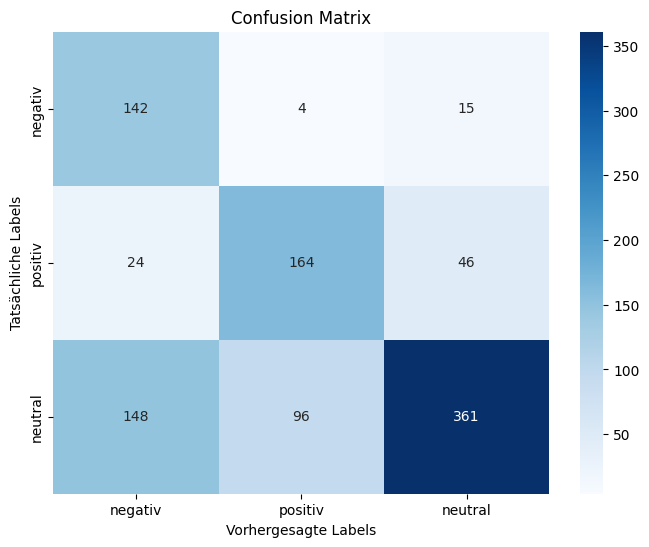

In [21]:
# Confusion Matrix berechnen (true_labels und predicted_labels sind die tatsächlichen und vorhergesagten Labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Klassenlabels definieren
class_names = ['negativ', 'positiv', 'neutral']

# Confusion Matrix als Heatmap darstellen
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Achsen beschriften
plt.xlabel('Vorhergesagte Labels')
plt.ylabel('Tatsächliche Labels')
plt.title('Confusion Matrix')

# Plot anzeigen
plt.show()

## Gemini

In [19]:
genai_model

genai.GenerativeModel(
    model_name='models/gemini-1.5-flash-001',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

### SST2

In [22]:
# System-Prompts

genai_model=genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  system_instruction="""You classify sentiments of a text.
                 Use 0 for negative and 1 for positive Sentiments. Return only 0 or 1 without additional text.
                 Here is an example: 
                 Input: Classify the following text into one of these two sentiments ['negative', 'positive']: Text: 'enriched by an imaginatively mixed cast of antic spirits'
                 Output: 1
                 """)


# Leeres DataFrame erstellen, um die Ergebnisse zu speichern
results_gemini_df = pd.DataFrame(columns=['index', 'sentence', 'generated_label'])

# Zähler für das Einfügen in das DataFrame
row_counter = 0

# Schleife mit API-Call
for index, row in sst2_subset.iterrows():
    text = row['sentence']

    try:
        # GenAI Model-Aufruf für die Sentiment-Klassifikation
        response = genai_model.generate_content(f"""Classify the following text into one of these two sentiments ['negative', 'positive']. Text: {text}.""")
        print(index, " ", response.text)

        # Ergebnis in das DataFrame effizient speichern
        results_gemini_df.loc[row_counter] = [index, text, response.text]
        row_counter += 1

    except Exception as e:
        # Fehlerbehandlung, wenn etwas beim API-Aufruf oder Speichern schiefgeht
        print(f"Fehler bei der Verarbeitung der Zeile {index}: {str(e)}")

# Entferne Zeilenumbrüche und Leerzeichen aus der Spalte 'generated_label'
results_gemini_df['generated_label'] = results_gemini_df['generated_label'].str.strip()

# Behalte nur die Zeilen mit generierten Labels, die entweder 0 oder 1 sind
results_gemini_df_final = results_gemini_df[results_gemini_df['generated_label'].isin(['0', '1',0,1])]

# als int formatieren
results_gemini_df_final['generated_label'] = results_gemini_df_final['generated_label'].astype(int)




0   0 

1   0 

2   1 

3   0 

4   0 

5   0 

6   1

Fehler bei der Verarbeitung der Zeile 7: Invalid operation: The `response.text` quick accessor requires the response to contain a valid `Part`, but none were returned. Please check the `candidate.safety_ratings` to determine if the response was blocked.
8   0 

9   1 

10   0 

11   0 

12   0 

13   0 

14   0 

15   1 

16   0 

17   1 

18   0 

19   1 

20   1 

21   1 

22   1 

23   1 

24   0 

25   1 

26   0 

27   0 

28   1 

29   0 

30   0 

31   1 

32   0 

33   0 

34   0 

35   1 

36   1

37   1 

38   0 

39   0 

40   0 

41   0 

42   0 

43   1 

44   0 

45   1 

46   0 

47   0 

48   1 

49   0 

50   0 

51   1 

52   0 

53   1 

54   0 

55   0 

56   0 

57   1 

58   1 

59   0 

60   1 

61   0 

62   0 

63   0 

64   0 

65   1 

66   0 

67   0 

68   0 

69   1 

70   0 

71   0 

72   1 

73   0 

74   0 

75   1 

76   0 

77   0 

78   0 

79   1 

80   1 

81   0 

82   1 

83   1 

84   1 

8

In [23]:

# CSV abspeichern 
results_gemini_df_final.to_csv('/Users/marvinschmitt/Library/CloudStorage/OneDrive-Persönlich/M.Sc. Data Science/17 Masterarbeit/Repo/Prod/CSVs/SC_SST2_ONE_SHOT_GEMINI.csv')

#### Evaluation

In [24]:

# Annahme: Beide DataFrames haben eine Spalte 'index' als gemeinsamen Schlüssel
# results_gpt_df: enthält die von LLM generierten Sentiment-Labels
# sst2_subset: enthält die tatsächlichen (gold standard) Sentiment-Labels

# Beide DataFrames anhand der 'index'-Spalte mergen
df_combined = pd.merge(sst2_subset, results_gemini_df_final, on='index')

# Die Spalten 'label' und 'generated_label' sollten die tatsächlichen und vorhergesagten Labels enthalten
true_labels = df_combined['label']  # Tatsächliche Labels (z.B. aus SST2)
predicted_labels = df_combined['generated_label']  # Vorhergesagte Labels (z.B. aus GPT)

# 1. Accuracy (Genauigkeit)
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2f}')

# 2. Precision (Genauigkeit der positiven Klassifikation)
precision = precision_score(true_labels, predicted_labels, pos_label=1)
print(f'Precision: {precision:.2f}')

# 3. Recall (Empfindlichkeit, Trefferquote)
recall = recall_score(true_labels, predicted_labels, pos_label=1)
print(f'Recall: {recall:.2f}')

# 4. F1-Score (harmonisches Mittel von Precision und Recall)
f1 = f1_score(true_labels, predicted_labels, pos_label=1)
print(f'F1-Score: {f1:.2f}')

# 5. Confusion Matrix (Verwirrungsmatrix)
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=[0,1])
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.89
Precision: 0.99
Recall: 0.81
F1-Score: 0.89
Confusion Matrix:
[[436   5]
 [101 440]]


### SB10k

In [25]:
# system-prompt gemini

genai_model=genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  system_instruction="""Du klassifizierst die Sentiments eines Textes. Verwende 0 für negativ, 1 für positiv und 2 für neutral. 
                          Gib nur 0, 1 oder 2 zurück, ohne zusätzlichen Text. 
                          Hier ist ein Beispiel:
                          Eingabe: Klassifiziere den folgenden Text in einen von diesen drei Sentiments ['negativ', 'positiv', 'neutral']: Text: {text}.  ‘@danieleicher PIN bitte per DM, welches Modell soll ich Dir kaufen?’
                          Ausgabe: 2""")


# Leeres DataFrame erstellen, um die Ergebnisse zu speichern
results_sb10k_gemini_df = pd.DataFrame(columns=['index', 'sentence', 'generated_label'])

# Zähler für das Einfügen in das DataFrame
row_counter = 0

# Schleife mit API-Call
for index, row in sb10k_subset.iterrows():
    text = row['Text']

    try:
        # GenAI Model-Aufruf für die Sentiment-Klassifikation
        response = genai_model.generate_content(f"Klassifiziere den folgenden Text in einen von diesen drei Sentiments ['negativ', 'positiv', 'neutral']: Text: {text}.")
        print(index, " ", response.text)

        # Ergebnis in das DataFrame effizient speichern
        results_sb10k_gemini_df.loc[row_counter] = [index, text, response.text]
        row_counter += 1

    except Exception as e:
        # Fehlerbehandlung, wenn etwas beim API-Aufruf oder Speichern schiefgeht
        print(f"Fehler bei der Verarbeitung der Zeile {index}: {str(e)}")

# Entferne Zeilenumbrüche und Leerzeichen aus der Spalte 'generated_label'
results_sb10k_gemini_df['generated_label'] = results_sb10k_gemini_df['generated_label'].str.strip()

# Behalte nur die Zeilen mit generierten Labels, die entweder 0 oder 1 sind
results_gemini_df_final = results_sb10k_gemini_df[results_sb10k_gemini_df['generated_label'].isin(['0', '1','2',0,1,2])]

# als int formatieren
results_gemini_df_final['generated_label'] = results_gemini_df_final['generated_label'].astype(int)



0   1

1   2

2   0

3   2

4   0

5   2

6   1

7   0

8   2

9   1

10   0

11   2

12   2

13   2

14   1

15   0

16   0

17   2

18   0

19   1

20   0

21   2

22   1

23   1

24   2

25   2

26   2

27   0

28   0

29   2

30   2

31   0

32   0

33   1

34   2

35   2

36   0

37   2

38   2

39   2

40   0

41   2

42   0

43   2

44   1

45   1

46   0

47   1

48   0

49   0

50   1

51   0

52   1

53   0 

54   0

55   0

56   1

57   1

58   0

59   2

60   2

61   2

62   2

63   2

64   2

65   2

66   1

67   1

68   1

69   2

70   0

71   2

72   0

73   1

74   0

75   2

76   1

77   2

78   2

79   2

80   2

81   1

82   1

83   0

84   2

85   1

86   0

87   2

88   0

89   1

90   2

91   1

92   2

93   0

94   1

95   1

96   2

97   0

98   0

99   1

100   1

101   0

102   1

103   0

104   2

105   0

106   0

107   2

108   2

109   1

110   2

111   2

112   2

113   0 

114   0

115   1

116   2

117   1

Fehler bei der Verarbeitung der Zeile 118: Inv

In [26]:

# CSV abspeichern 
results_gemini_df_final.to_csv('/Users/marvinschmitt/Library/CloudStorage/OneDrive-Persönlich/M.Sc. Data Science/17 Masterarbeit/Repo/Prod/CSVs/SC_SB10k_ONE_SHOT_GEMINI.csv')



#### Evaluation

In [27]:

# Beide DataFrames anhand der 'index'-Spalte mergen
df_combined = pd.merge(sb10k_subset, results_gemini_df_final, on='index')

# Die Spalten 'label' und 'generated_label' sollten die tatsächlichen und vorhergesagten Labels enthalten
true_labels = df_combined['sentiment_coded']  # Tatsächliche Labels (z.B. aus SST2)
predicted_labels = df_combined['generated_label']  # Vorhergesagte Labels (z.B. aus GPT)

# 1. Accuracy (Genauigkeit)
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.2f}')

# 2. Precision (Genauigkeit der Klassifikation für alle Klassen)
precision = precision_score(true_labels, predicted_labels, average='macro')
print(f'Precision (macro): {precision:.2f}')

# 3. Recall (Empfindlichkeit für alle Klassen)
recall = recall_score(true_labels, predicted_labels, average='macro')
print(f'Recall (macro): {recall:.2f}')

# 4. F1-Score (harmonisches Mittel von Precision und Recall für alle Klassen)
f1 = f1_score(true_labels, predicted_labels, average='macro')
print(f'F1-Score (macro): {f1:.2f}')

# 5. Confusion Matrix (Verwirrungsmatrix)
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=[0, 1, 2])
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.59
Precision (macro): 0.59
Recall (macro): 0.67
F1-Score (macro): 0.58
Confusion Matrix:
[[136   3  15]
 [ 31 144  57]
 [207  89 303]]


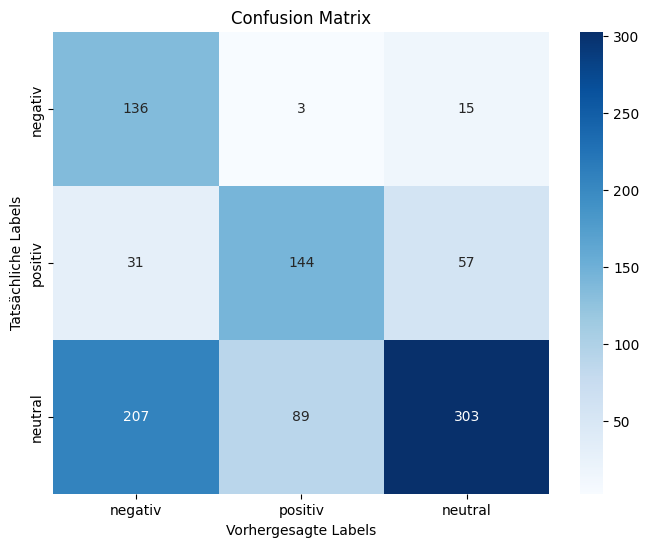

In [28]:
# Confusion Matrix berechnen (true_labels und predicted_labels sind die tatsächlichen und vorhergesagten Labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Klassenlabels definieren
class_names = ['negativ', 'positiv', 'neutral']

# Confusion Matrix als Heatmap darstellen
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Achsen beschriften
plt.xlabel('Vorhergesagte Labels')
plt.ylabel('Tatsächliche Labels')
plt.title('Confusion Matrix')

# Plot anzeigen
plt.show()